## Visualisation des données

In [43]:
import pandas as pd

import os

In [44]:
#Répertoire du fichier de données
RAWFILES_DIR = '../data/raw/'
PROCESSED_DIR = '../data/processed/'

#Table principale
ALL_DATA_FILE = 'all_data.csv'

In [45]:
epidemie_df = (pd.read_csv(os.path.join(PROCESSED_DIR, ALL_DATA_FILE), parse_dates=['Last Update'])
               .assign(day=lambda _df: _df['Last Update'].dt.date))

In [46]:
epidemie_df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source,day
0,Anhui,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,31.8257,117.2264,01-22-2020.csv,2020-01-22
1,Beijing,Mainland China,2020-01-22 17:00:00,14.0,NaN,NaN,40.1824,116.4142,01-22-2020.csv,2020-01-22
2,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,NaN,NaN,30.0572,107.8740,01-22-2020.csv,2020-01-22
3,Fujian,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,26.0789,117.9874,01-22-2020.csv,2020-01-22
4,Gansu,Mainland China,2020-01-22 17:00:00,NaN,NaN,NaN,36.0611,103.8343,01-22-2020.csv,2020-01-22


In [5]:
epidemie_df.dtypes

Province/State            object
Country/Region            object
Last Update       datetime64[ns]
Confirmed                float64
Deaths                   float64
Recovered                float64
Latitude                 float64
Longitude                float64
source                    object
dtype: object

In [47]:
epidemie_df['Country/Region'].value_counts()


US                            1560
Mainland China                1517
China                          363
Australia                      314
Canada                         242
France                         118
Thailand                        60
Japan                           60
Singapore                       59
Malaysia                        58
Vietnam                         58
Nepal                           57
Sri Lanka                       55
Cambodia                        55
Germany                         54
United Arab Emirates            53
Finland                         53
Philippines                     53
India                           52
Italy                           51
Sweden                          51
Spain                           50
Russia                          50
Taiwan                          48
South Korea                     48
Macau                           48
Hong Kong                       48
United Kingdom                  48
Belgium             

## Epidémie en France

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [21]:
%matplotlib inline

In [49]:
epidemie_df[(epidemie_df['Country/Region'] == 'France') & (epidemie_df['Province/State'] == 'France')].sort_values('day', ascending=False).head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source,day
7318,France,France,2020-03-21 20:43:02,14282.0,562.0,12.0,46.2276,2.2137,03-21-2020.csv,2020-03-21
7019,France,France,2020-03-20 22:43:03,12612.0,450.0,12.0,46.2276,2.2137,03-20-2020.csv,2020-03-20
6727,France,France,2020-03-19 20:43:02,10871.0,243.0,12.0,46.2276,2.2137,03-19-2020.csv,2020-03-19
6443,France,France,2020-03-18 18:33:02,9043.0,148.0,12.0,46.2276,2.2137,03-18-2020.csv,2020-03-18
6168,France,France,2020-03-17 19:13:08,7652.0,148.0,12.0,46.2276,2.2137,03-17-2020.csv,2020-03-17


In [50]:
france_df = (epidemie_df[epidemie_df['Country/Region'] == 'France']
             .drop_duplicates(subset=['Province/State', 'day'])
             .groupby(by=['Country/Region', 'day'])
             .agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
             .reset_index()
            )

In [51]:
france_df.head(), france_df.tail()

(  Country/Region         day  Confirmed  Deaths  Recovered
 0         France  2020-01-24        2.0     0.0        0.0
 1         France  2020-01-25        3.0     0.0        0.0
 2         France  2020-01-26        3.0     0.0        0.0
 3         France  2020-01-27        3.0     0.0        0.0
 4         France  2020-01-28        4.0     0.0        0.0,
    Country/Region         day  Confirmed  Deaths  Recovered
 31         France  2020-03-17     7674.0   148.0       12.0
 32         France  2020-03-18     9046.0   148.0       12.0
 33         France  2020-03-19    10883.0   243.0       12.0
 34         France  2020-03-20    12623.0   450.0       12.0
 35         France  2020-03-21    14301.0   562.0       12.0)

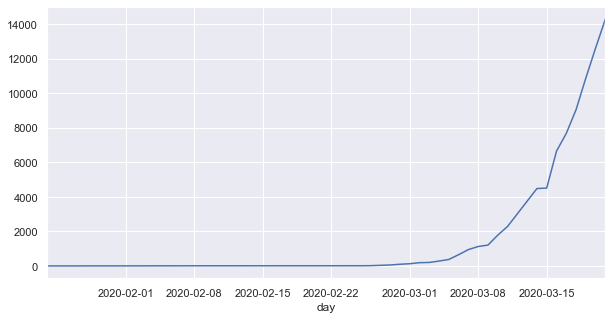

In [52]:
france_df.set_index('day')['Confirmed'].plot(figsize=(10, 5));


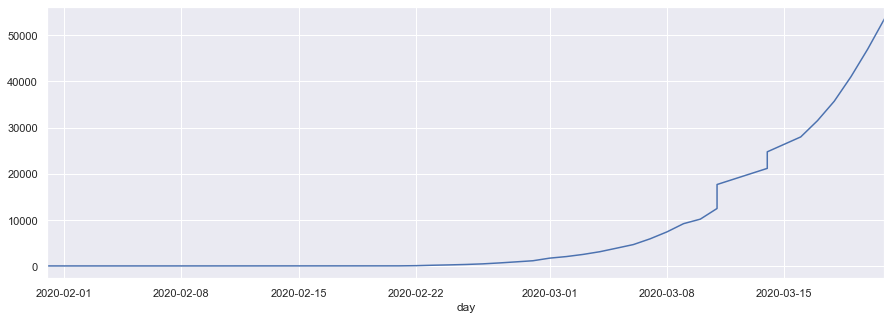

In [53]:
epidemie_df[epidemie_df['Country/Region'] == 'Italy'].set_index('day')['Confirmed'].plot(figsize=(15, 5));

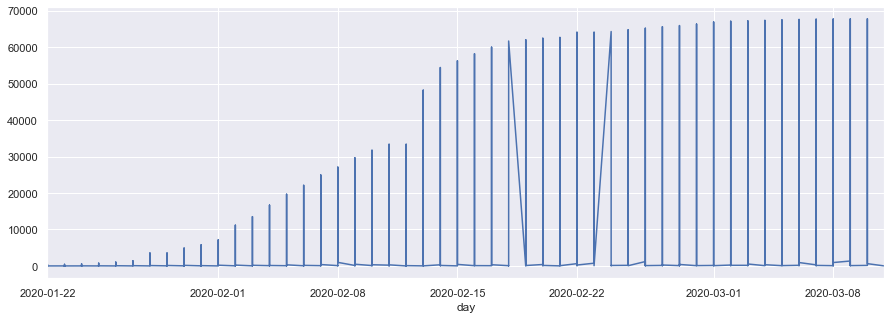

In [54]:
epidemie_df[epidemie_df['Country/Region'] == 'Mainland China'].set_index('day')['Confirmed'].plot(figsize=(15, 5));

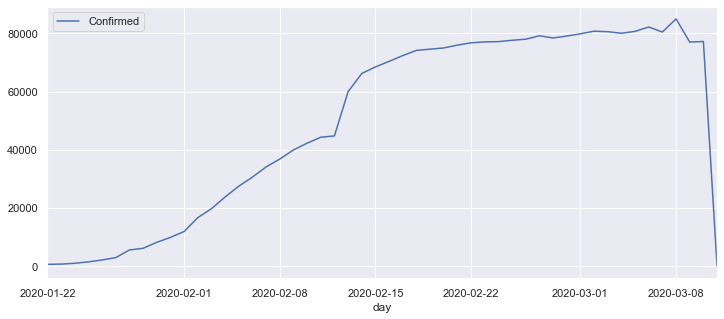

In [55]:
(epidemie_df[epidemie_df['Country/Region'] == 'Mainland China']
 .groupby('day')
 .agg({'Confirmed': 'sum'})
).plot(figsize=(12, 5));

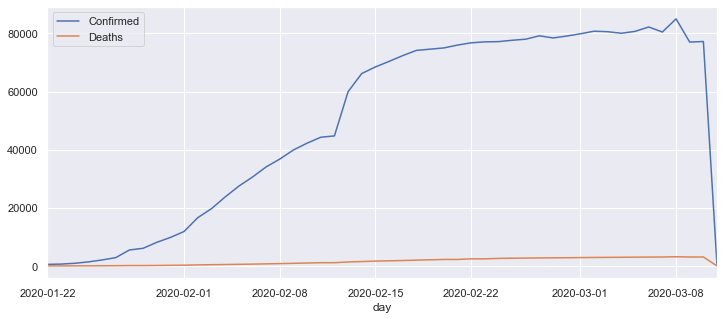

In [56]:
(epidemie_df[epidemie_df['Country/Region'] == 'Mainland China']
 .fillna(value=0)
 .groupby('day')
 .agg({'Confirmed': 'sum', 'Deaths': 'sum'})
).plot(figsize=(12, 5));

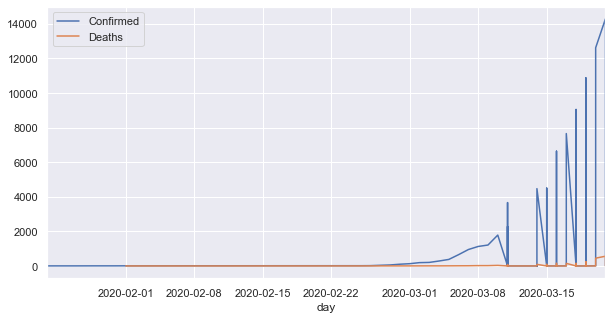

In [57]:
epidemie_df[epidemie_df['Country/Region'] == 'France'].set_index('day')[ ['Confirmed', 'Deaths'] ].plot(figsize=(10, 5));

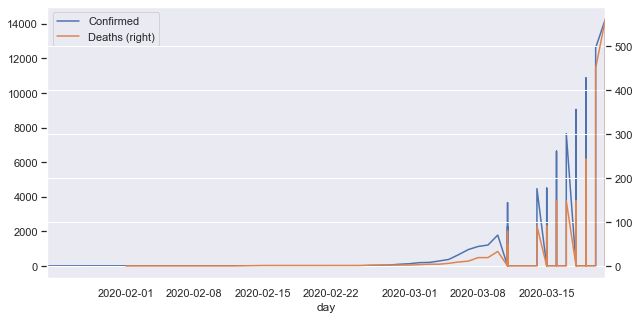

In [58]:
(epidemie_df[epidemie_df['Country/Region'] == 'France']
 .set_index('day')[ ['Confirmed', 'Deaths'] ]
 .plot(secondary_y=['Deaths'], figsize=(10, 5))
);

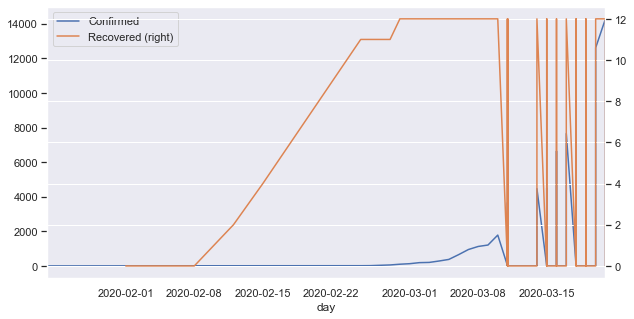

In [59]:
(epidemie_df[epidemie_df['Country/Region'] == 'France']
 .set_index('day')[ ['Confirmed', 'Recovered'] ]
 .plot(secondary_y=['Recovered'], figsize=(10, 5))
);

In [60]:
china_df = (epidemie_df[epidemie_df['Country/Region'] == 'Mainland China']
            .groupby('day')
            .agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
           )

In [61]:
china_df.head()

,Confirmed,Deaths,Recovered
day,,,
2020-01-22,547.0,17.0,28.0
2020-01-23,639.0,18.0,30.0
2020-01-24,916.0,26.0,36.0
2020-01-25,1399.0,42.0,39.0
2020-01-26,2062.0,56.0,49.0


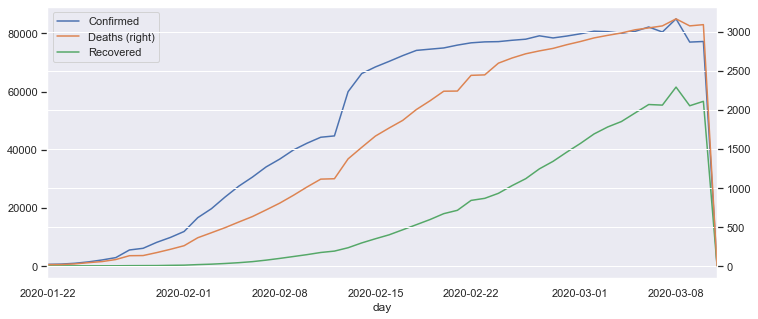

In [62]:
china_df.plot(secondary_y=['Deaths'], figsize=(12, 5));


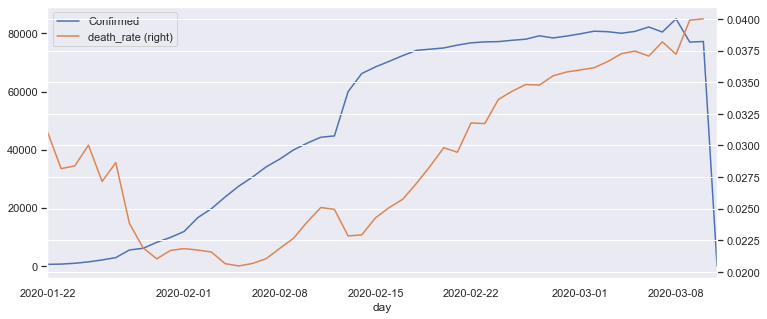

In [63]:
(china_df
 .assign(death_rate=lambda _df: _df['Deaths'] / _df['Confirmed'])
 [['Confirmed', 'death_rate']]
 .plot(secondary_y=['death_rate'], figsize=(12, 5))
);


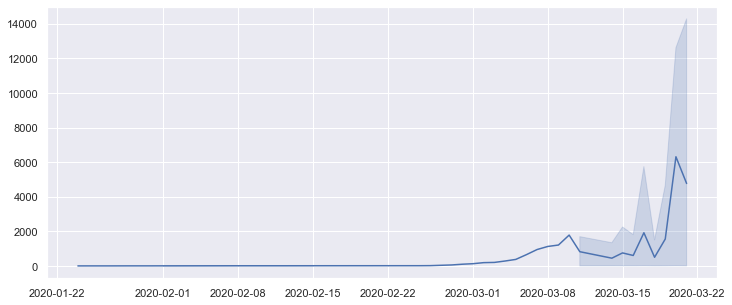

In [64]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=epidemie_df[epidemie_df['Country/Region'] == 'France'].set_index('day')['Confirmed']);

In [65]:
epidemie_df.groupby(['Country/Region', 'day']).agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})


Confirmed  Deaths  Recovered
Country/Region                 day                                     
 Azerbaijan                    2020-02-28        1.0     0.0        0.0
Afghanistan                    2020-02-24       13.0     0.0        0.0
                               2020-03-08        8.0     0.0        0.0
                               2020-03-10        5.0     0.0        0.0
                               2020-03-11       21.0     0.0        0.0
                               2020-03-14       11.0     0.0        0.0
                               2020-03-15       16.0     0.0        0.0
                               2020-03-16       21.0     0.0        1.0
                               2020-03-17       66.0     0.0        3.0
                               2020-03-20       48.0     0.0        2.0
Albania                        2020-03-09        2.0     0.0        0.0
                               2020-03-10       10.0     0.0        0.0
                               2020-03-11       45.0     2.0        0.0
                               2020-03-12       23.0     1.0        0.0
                               2020-03-14       38.0     1.0        0.0
                               2020-03-15       42.0     1.0        0.0
                               2020-03-16       51.0     1.0        0.0
                               2020-03-17       55.0     1.0        0.0
                               2020-03-18       59.0     2.0        0.0
                               2020-03-19       64.0     2.0        0.0
                               2020-03-20       70.0     2.0        0.0
                               2020-03-21       76.0     2.0        2.0
Algeria                        2020-02-25        6.0     0.0        0.0
                               2020-03-02        3.0     0.0        0.0
                               2020-03-03        5.0     0.0        0.0
                               2020-03-04       24.0     0.0        0.0
                               2020-03-06       34.0     0.0        0.0
                               2020-03-08       19.0     0.0        0.0
                               2020-03-09       60.0     0.0        0.0
                               2020-03-11       26.0     2.0        8.0
...                                              ...     ...        ...
Vietnam                        2020-01-29        2.0     0.0        0.0
                               2020-01-30        2.0     0.0        0.0
                               2020-01-31        2.0     0.0        0.0
                               2020-02-01       12.0     0.0        2.0
                               2020-02-03       24.0     0.0        3.0
                               2020-02-06       20.0     0.0        2.0
                               2020-02-08       26.0     0.0        2.0
                               2020-02-10       14.0     0.0        1.0
                               2020-02-11       30.0     0.0       12.0
                               2020-02-13      128.0     0.0       56.0
                               2020-02-21       64.0     0.0       56.0
                               2020-02-25      176.0     0.0      176.0
                               2020-03-07       18.0     0.0       16.0
                               2020-03-08       60.0     0.0       32.0
                               2020-03-11       85.0     0.0       32.0
                               2020-03-12       39.0     0.0       16.0
                               2020-03-14       53.0     0.0       16.0
                               2020-03-15       56.0     0.0       16.0
                               2020-03-16       61.0     0.0       16.0
                               2020-03-17       66.0     0.0       16.0
                               2020-03-18       75.0     0.0       16.0
                               2020-03-19       85.0     0.0       16.0
                               2020-03-20       91.0     0.0       16.0
           

In [67]:
EUROPE = ['France', 'Germany', 'UK', 'Spain']

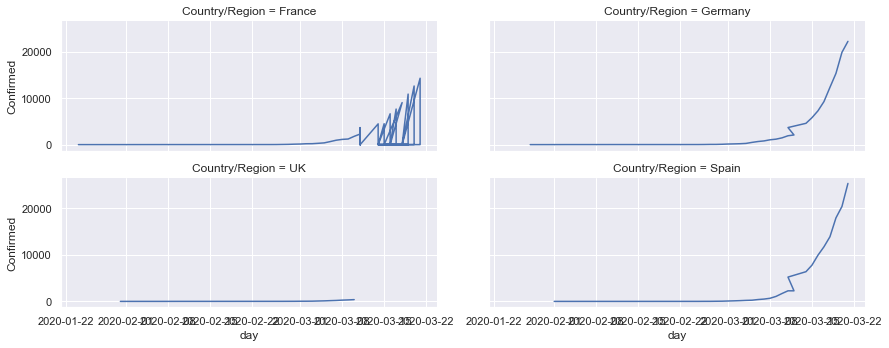

In [68]:
import matplotlib.pyplot as plt

g = sns.FacetGrid(epidemie_df[epidemie_df['Country/Region'].isin(EUROPE)],
                  col="Country/Region", col_wrap=2, height=2.5, aspect=2.5)
g = g.map(plt.plot, "day", "Confirmed");

In [69]:
#import chart-studio.plotly as py
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode, plot, iplot

In [70]:
france_df = epidemie_df[epidemie_df['Country/Region']=='France']

In [71]:
data = [go.Scatter(x=france_df['day'],
                   y=france_df['Confirmed'],
                   name='Confirmés/France'
                   ),
        go.Scatter(x=epidemie_df[epidemie_df['Country/Region'] == 'Germany']['day'],
                   y=epidemie_df[epidemie_df['Country/Region'] == 'Germany']['Confirmed'],
                   name='Confirmés/Allemagne'
                   )
        ]
    
layout = dict(
    title = "Epidémie Corona Virus",
    xaxis = dict(range = ['2020-01-22', '2020-03-05'])
)
    
fig = dict(data=data, layout=layout)
py.iplot(fig)

In [72]:
import yaml

ENV_FILE = '../env.yaml'
with open(ENV_FILE) as f:
    params = yaml.load(f, Loader=yaml.FullLoader)

In [73]:
params


{'directories': {'processed': 'data/processed/', 'raw': 'data/raw/'},
 'files': {'all_data': 'all_data.csv'}}

In [74]:
os.path.abspath(ENV_FILE)

'C:\\Users\\vince\\OneDrive\\Documents\\coronav\\env.yaml'

In [75]:
os.path.dirname(os.path.abspath(ENV_FILE))


'C:\\Users\\vince\\OneDrive\\Documents\\coronav'

In [76]:
import datetime

epidemie_df[epidemie_df['Country/Region'] == 'Mainland China'][lambda df: df.day <= datetime.date(2020, 3, 10)].sort_values('day').tail(20)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source,day
4263,Chongqing,Mainland China,2020-03-09 23:13:03,576.0,6.0,542.0,30.0572,107.8740,03-09-2020.csv,2020-03-09
4558,Liaoning,Mainland China,2020-03-10 04:13:09,125.0,1.0,111.0,41.2956,122.6085,03-10-2020.csv,2020-03-10
4557,Gansu,Mainland China,2020-03-10 14:33:13,125.0,2.0,88.0,36.0611,103.8343,03-10-2020.csv,2020-03-10
4555,Shanxi,Mainland China,2020-03-10 23:53:02,133.0,0.0,131.0,37.5777,112.2922,03-10-2020.csv,2020-03-10
4554,Tianjin,Mainland China,2020-03-10 10:13:25,136.0,3.0,131.0,39.3054,117.3230,03-10-2020.csv,2020-03-10
4552,Guizhou,Mainland China,2020-03-10 01:13:07,146.0,2.0,129.0,26.8154,106.8748,03-10-2020.csv,2020-03-10
4539,Shanghai,Mainland China,2020-03-10 06:13:14,344.0,3.0,319.0,31.2020,121.4491,03-10-2020.csv,2020-03-10
4545,Guangxi,Mainland China,2020-03-10 00:53:02,252.0,2.0,234.0,23.8298,108.7881,03-10-2020.csv,2020-03-10
4534,Beijing,Mainland China,2020-03-10 01:13:07,429.0,8.0,320.0,40.1824,116.4142,03-10-2020.csv,2020-03-10
4533,Heilongjiang,Mainland China,2020-03-10 00:13:18,481.0,13.0,434.0,47.8620,127.7615,03-10-2020.csv,2020-03-10


In [77]:
epidemie_df['day'].min()


datetime.date(2020, 1, 22)

In [78]:
epidemie_df['day'].unique()


array([datetime.date(2020, 1, 22), datetime.date(2020, 1, 23),
       datetime.date(2020, 1, 24), datetime.date(2020, 1, 25),
       datetime.date(2020, 1, 26), datetime.date(2020, 1, 27),
       datetime.date(2020, 1, 28), datetime.date(2020, 1, 29),
       datetime.date(2020, 1, 30), datetime.date(2020, 1, 31),
       datetime.date(2020, 2, 1), datetime.date(2020, 2, 2),
       datetime.date(2020, 2, 3), datetime.date(2020, 2, 4),
       datetime.date(2020, 2, 5), datetime.date(2020, 2, 6),
       datetime.date(2020, 2, 7), datetime.date(2020, 2, 8),
       datetime.date(2020, 2, 9), datetime.date(2020, 2, 10),
       datetime.date(2020, 2, 11), datetime.date(2020, 2, 12),
       datetime.date(2020, 2, 13), datetime.date(2020, 2, 14),
       datetime.date(2020, 2, 15), datetime.date(2020, 2, 16),
       datetime.date(2020, 2, 17), datetime.date(2020, 2, 18),
       datetime.date(2020, 2, 19), datetime.date(2020, 2, 20),
       datetime.date(2020, 2, 21), datetime.date(2020, 2, 22),
 

In [79]:
str(epidemie_df['day'].min())


'2020-01-22'

In [80]:
(epidemie_df['day'].max() - epidemie_df['day'].min()).days


59

In [81]:
{i:str(date) for i, date in enumerate(epidemie_df['day'].unique())}


{0: '2020-01-22',
 1: '2020-01-23',
 2: '2020-01-24',
 3: '2020-01-25',
 4: '2020-01-26',
 5: '2020-01-27',
 6: '2020-01-28',
 7: '2020-01-29',
 8: '2020-01-30',
 9: '2020-01-31',
 10: '2020-02-01',
 11: '2020-02-02',
 12: '2020-02-03',
 13: '2020-02-04',
 14: '2020-02-05',
 15: '2020-02-06',
 16: '2020-02-07',
 17: '2020-02-08',
 18: '2020-02-09',
 19: '2020-02-10',
 20: '2020-02-11',
 21: '2020-02-12',
 22: '2020-02-13',
 23: '2020-02-14',
 24: '2020-02-15',
 25: '2020-02-16',
 26: '2020-02-17',
 27: '2020-02-18',
 28: '2020-02-19',
 29: '2020-02-20',
 30: '2020-02-21',
 31: '2020-02-22',
 32: '2020-02-23',
 33: '2020-02-24',
 34: '2020-02-25',
 35: '2020-02-26',
 36: '2020-02-27',
 37: '2020-02-28',
 38: '2020-02-29',
 39: '2020-03-01',
 40: '2020-03-02',
 41: '2020-03-03',
 42: '2020-03-04',
 43: '2020-03-05',
 44: '2020-03-06',
 45: '2020-03-07',
 46: '2020-03-08',
 47: '2020-03-09',
 48: '2020-03-10',
 49: '2020-03-11',
 50: '2020-03-12',
 51: '2020-03-13',
 52: '2020-03-14',
 53

In [82]:
epidemie_df.apply(lambda r: r['Country/Region'] + ' (' + str(r['Confirmed']) + ')', axis=1)


0                         Mainland China (1.0)
1                        Mainland China (14.0)
2                         Mainland China (6.0)
3                         Mainland China (1.0)
4                         Mainland China (nan)
5                        Mainland China (26.0)
6                         Mainland China (2.0)
7                         Mainland China (1.0)
8                         Mainland China (4.0)
9                         Mainland China (1.0)
10                        Mainland China (nan)
11                        Mainland China (5.0)
12                             Hong Kong (nan)
13                      Mainland China (444.0)
14                        Mainland China (4.0)
15                        Mainland China (nan)
16                        Mainland China (1.0)
17                        Mainland China (2.0)
18                        Mainland China (nan)
19                        Mainland China (2.0)
20                                 Macau (1.0)
21           